<a href="https://colab.research.google.com/github/MaureenGatu/KNN-and-Naive-Bayes-ML-Models/blob/main/Taitanic_Survivor's_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> From the two taitanic passenger's data, create a model that predicts whether the specific passenger survived or not.

### b) Defining the Metric for Success



> Develop a model with at least 80% accurate.



### c) Understanding the context 

At 11.40pm on the night of 14 April 1912, on her maiden voyage from Southampton to New York, the RMS Titanic struck the iceberg that would ultimately lead to the sinking of the ship less than 3 hours later.

At around 2.20am on the morning of 15 April, the Titanic disappeared beneath the surface of the Atlantic Ocean, a disaster that resulted in the loss of more than 1,500 lives, almost two-thirds of the people on board.

The variables on our extracted dataset are pclass, survived, name, age, embarked, ticke and sex. pclass refers to passenger class (1st, 2nd, 3rd),
and is a proxy for socio-economic class. Age is in years, and some infants had
fractional values.

### d) Recording the Experimental Design

1. Importing the libraries

2. Loading the data

3. Data Cleaning

4. Feature Engineering 

6. Exploratory analysis

7. k-Nearest Neighbours Model

8.  Conclusion

## 2. Reading the Data

In [60]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn import metrics
import seaborn as sns

In [61]:
# Loading the Data from the source i.e. csv
# ---
url = 'https://archive.org/download/train5_202002/train%20%285%29.csv'
url2  = 'https://archive.org/download/test1_202002/test%20%281%29.csv'
# ---
#
df_train = pd.read_csv(url)
test_data = pd.read_csv(url2)
df_test = test_data.copy(deep = True)



## 3. Checking the Data

In [62]:
# Determining the no. of records in our datasets
#
print('Shape of the train dataset  : ', df_train.shape)
print('\nShape of the test dataset  : ', df_test.shape)

Shape of the train dataset  :  (891, 12)

Shape of the test dataset  :  (418, 11)


In [63]:
# Previewing the top of our  train dataset
#
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# Previewing the bottom of our  train dataset
# 
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
# Previewing the top of our  test dataset
#
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
# Previewing the bottom of our  test dataset
# 
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [67]:
# Checking whether each train column has an appropriate datatype
#
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
# Checking whether each test column has an appropriate datatype
#
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. External Data Source Validation

Titanic's passengers numbered 1,317 people: 324 in first class(ratio : 0.24601), 284 in second class(ratio: 0.21564), and 709 in third class(ratio : 0.53834). Of these, 805 were male and 434 were female; 112 children were aboard, the largest number of which were in third class.805 (ratio : 0.61123)were male and 434 were female(ratio : 0.32953). [Link](https://)

The overall survival rate for men was 20% while for women, it was 74%. [LINK](https://)

In [116]:
#Compare this information with our data
df_train['Pclass'].value_counts(normalize = True)  #The datasets reflects the actual passenger information 

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64

In [118]:
#check the ditribution of gender to compare with actual taitanic report.


df_train['Sex'].value_counts(normalize = True)  # The datasets reflects the actual passenger information

male      0.649044
female    0.350956
Name: Sex, dtype: float64

In [119]:
#Check survival ratio by gender
df_train.groupby('Survived')['Sex'].value_counts(normalize = True) # The datasets reflects the actual passenger information

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.679412
          male      0.320588
Name: Sex, dtype: float64

## 5. Tidying the Dataset

In [69]:
# Identifying the Missing Data in train dataset
#
print('Size of the data : ', len(df_train))
df_train.isnull().sum()

Size of the data :  891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
# Identifying the Missing Data in test dataset
#
print('Size of the data : ', len(df_test))
df_test.isnull().sum()


Size of the data :  418


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> In both the training dataset and the test dataset, the Cabin column is missing more then half the records. For this reason, we will drop the column entirely.

> For the age column, we shall impute the missing data. The imputation shall be the mean age depending on the Pclass of the passager.





In [71]:
#Droping the Cabin column from both datasets
df_train.drop(['Cabin', 'Ticket'],axis = 1, inplace = True)
df_test.drop(['Cabin','Ticket'],axis = 1, inplace = True)

# Passger is not relevant to this study and thus the column was dropped

In [72]:
df_test.Pclass.unique()

array([3, 2, 1])

In [73]:
#Imputing the age column in train dataset

#group by sex and class
grp_class = df_train.groupby(['Sex', 'Pclass'])

#use the function that imputes by meadian
def impute_median(series):
  return series.fillna(series.median())

#impute with the median
df_train.Age = grp_class['Age'].transform(impute_median)

#Confirm if the missing values in age column have all been imputed.
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [74]:
#Imputing the age column in train dataset

#group by sex and class
grp_class = df_test.groupby(['Sex', 'Pclass'])

#use the function that imputes by meadian
def impute_median(series):
  return series.fillna(series.median())

#impute with the median
df_test.Age = grp_class['Age'].transform(impute_median)

#Confirm if the missing values in age column have all been imputed.
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [75]:
#We shall now drop the remaining missing values from each dataset
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

#confirm there are nome missing values
print('Test dataset \n\n', df_test.isnull().sum())
print('\nTrain dataset \n\n', df_train.isnull().sum())

Test dataset 

 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Train dataset 

 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [76]:
#Checking for Outliers
cols = [ 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Q1 = df_train[cols].quantile(0.05)
Q3 = df_train[cols].quantile(0.95)
IQR = Q3 -Q1
outliers = df_train[cols][((df_train[cols] < (Q1 - 1.5 * IQR)) |(df_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(11, 6)

In [77]:
#Checking for Outliers
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Q1 = df_test[col].quantile(0.25)
Q3 = df_test[col].quantile(0.75)
IQR = Q3 -Q1
outliers = df_test[col][((df_test[col] < (Q1 - 1.5 * IQR)) |(df_test[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

#previewing the outliers
# outliers
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

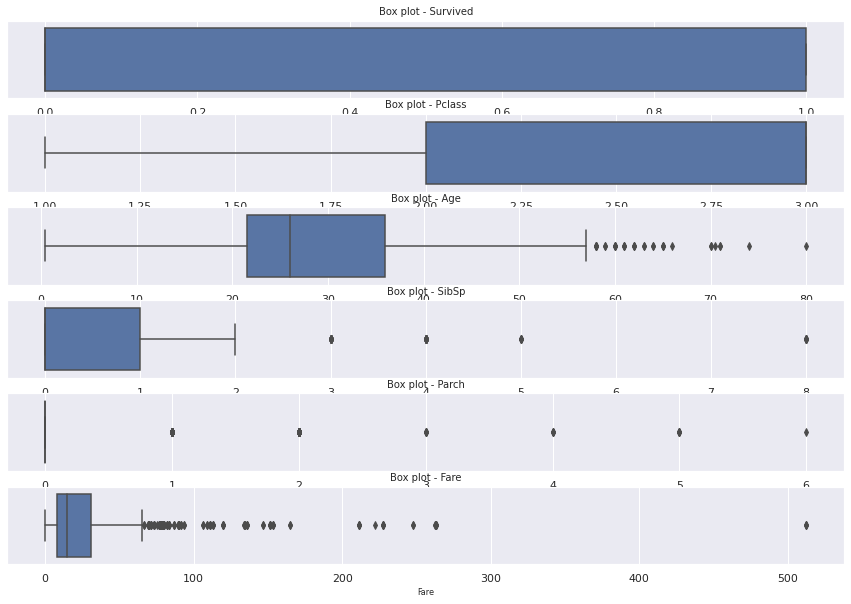

In [78]:
# Boxplot of outliers
cols = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
fig, ax = plt.subplots(len(cols), figsize=(15,10))

for i, col_val in enumerate(cols):
    sns.boxplot(df_train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [79]:
# More data cleaning procedures
#

#6. Feature Engineering

From the Name column, we are going to extract the passagers social status
This will be done by spliting the names column values to extract the title e.g ms,mrs,mr,doctor.
We will then group the passager into groups as they were during the time period.
The groupsshall be the social classes: Commoner, Noble, Clergy,Doub...

In [80]:
# Step 1: Spliting the Names column
df_train['first name'] = df_train['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
df_train['first name'] = df_train['first name'].str.strip() #strip leading and trailing white spaces
df_train['last name'] = df_train['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
df_train['last name'] = df_train['last name'].str.strip()
df_train['title'] = df_train['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
# Step 2: Etract the title
df_train['title'] = df_train['title'].str.strip()
# Step 3: Drop the othe created columns that were createed except title
df_train.drop(['first name','last name','Name'], inplace= True, axis = 1)

#Preview the dataset
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [81]:
# Step 1: Spliting the Names column
df_test['first name'] = df_test['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
df_test['first name'] = df_test['first name'].str.strip() #strip leading and trailing white spaces
df_test['last name'] = df_test['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
df_test['last name'] = df_test['last name'].str.strip()
df_test['title'] = df_test['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
# Step 2: Etract the title
df_test['title'] = df_test['title'].str.strip()
# Step 3: Drop the othe created columns that were createed except title
df_test.drop(['first name','last name','Name'], inplace= True, axis = 1)

#Check the unique values in the new title column
df_test.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [82]:
#we will then map the title to represent to popular titles during thee time period
mapping = {'Mlle': 'Commoner', 
           'Major': 'Military',
           'Col': 'Military',
           'Sir': 'Noble',
           'Don': 'Noble',
           'Mme': 'Commoner', 
           'Jonkheer': 'Noble', 
           'Lady': 'Noble',
           'Capt': 'Military',
           'the Countess': 'Noble',
           'Ms': 'Commoner', 
           'Dona': 'Mrs',
           'Mrs' : 'Commoner',
           'Mr' : 'Commoner',
           'Miss' : 'Commoner',
           'Rev' : 'Clergy',
           'Dr' : 'Doctor',
           'Master' : 'Commoner'}

df_train.replace({'title': mapping}, inplace=True)
df_test.replace({'title': mapping}, inplace=True)
#check the unique values in the dataset
df_test.title.unique()

array(['Commoner', 'Military', 'Clergy', 'Doctor', 'Mrs'], dtype=object)

In [83]:
#Sibsp represent the passager siblings and spause onboard while Parch represent passger Parent or Children onboard.
#All of these are family members. we will combine these two in one column named family to represnt all passager family members on board.
#we shall do this for both datasets
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']
#Since the information in the parch and sibsp column has been captured, we will drop these two columns
df_train.drop(['SibSp','Parch'], axis = 1, inplace=True)
df_test.drop(['SibSp','Parch'], axis = 1, inplace=True)

# 7. Exploratory Analysis

#### Measures of distribution and central tendancies.

In [84]:
# Checking for Anomalies and unique values in the data
#
colx = df_train.columns
for i in colx:
  print(i)
  print(df_train[i].unique())
  print('*****'*20)

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 24

In [85]:
#Train data descriptive statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.065433,32.096681,0.906637
std,256.998173,0.486260,0.834700,13.270162,49.697504,1.614703
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.500000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,26.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,36.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


In [86]:
#Test data descriptive statistics
df_test.describe()

,PassengerId,Pclass,Age,Fare,Family
count,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,29.223022,35.627188,0.841727
std,120.923774,0.842077,12.964355,55.907576,1.520338
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.000000,1.000000,22.000000,7.895800,0.000000
50%,1101.000000,3.000000,25.000000,14.454200,0.000000
75%,1205.000000,3.000000,36.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,512.329200,10.000000


In [87]:
for i in df_train.select_dtypes(include=np.number).columns.to_list():
  print(i)
  print("The skewness is:", df_train[i].skew())
  print("The kurtosis is:", df_train[i].kurt())
  s= abs(df_train[i].skew())
  if s > 1:
    print('\nhighly skewed distribution')
  else:
    print('')
  k = df_train[i].kurt()
  if k >3:
    print('\nthe distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('\nDistribution is light tailed')
  print("******"*10)

PassengerId
The skewness is: 0.0
The kurtosis is: -1.197156421963046


Distribution is light tailed
************************************************************
Survived
The skewness is: 0.4845676297760328
The kurtosis is: -1.7691794454365986


Distribution is light tailed
************************************************************
Pclass
The skewness is: -0.6369977585999191
The kurtosis is: -1.2694374832322646


Distribution is light tailed
************************************************************
Age
The skewness is: 0.5325738791317377
The kurtosis is: 0.7287292711659408


Distribution is light tailed
************************************************************
Fare
The skewness is: 4.801440211044194
The kurtosis is: 33.508477269700144

highly skewed distribution

the distribution is heavy-tailed(leptokutic)
************************************************************
Family
The skewness is: 2.723892053975516
The kurtosis is: 9.13566385741382

highly skewed distribution

the dist

In [88]:
#variance and standard deviation of the variables defined in our columns
for i in df_train.select_dtypes(include=np.number).columns.to_list():
  print(i)
  print(f'standard deviation:  {df_train[i].std()}')
  print(f'variance:  {df_train[i].var()}\n')
  print("******"*10)

PassengerId
standard deviation:  256.998172777183
variance:  66048.06081081081

************************************************************
Survived
standard deviation:  0.48625968831477473
variance:  0.23644848447998187

************************************************************
Pclass
standard deviation:  0.8346997785705771
variance:  0.6967237203457705

************************************************************
Age
standard deviation:  13.270161791950223
variance:  176.09719398453552

************************************************************
Fare
standard deviation:  49.69750431670801
variance:  2469.8419353092113

************************************************************
Family
standard deviation:  1.6147025929141483
variance:  2.6072644635636735

************************************************************


#### Univariate Exploratory visualizations

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Make a copy of the traing data
df = df_train.copy(deep=True)

Text(0.5, 1.0, 'Most popular ages of the passangers')

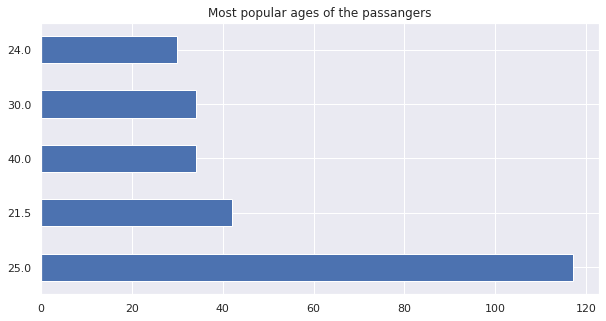

In [90]:
#Top 5 most popular age of passangers

df.Age.value_counts().sort_values(ascending = False).nlargest(5).plot.barh(figsize=(10,5))
plt.title('Most popular ages of the passangers')

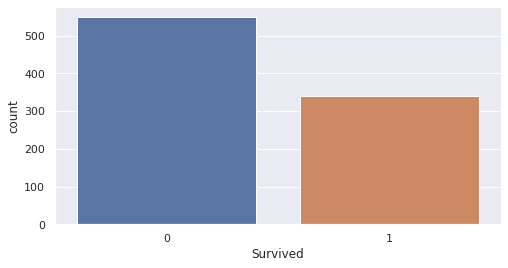

In [91]:
#Taitanic survivors vs non survivors

sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='Survived',data=df_train)

#### Bivariate Analysis

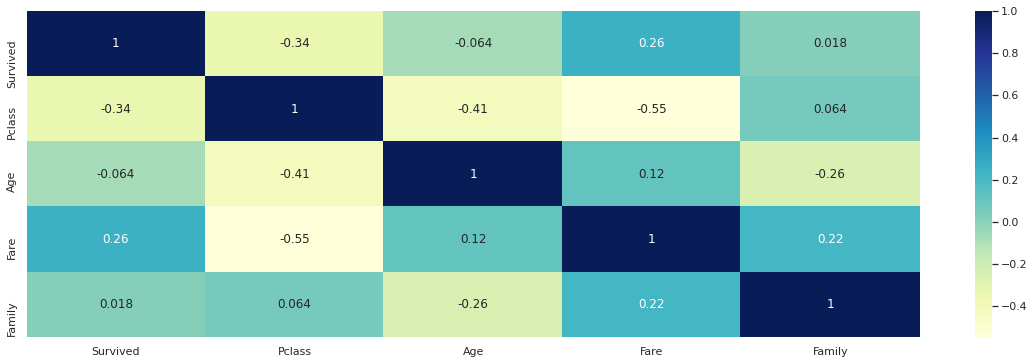

In [92]:
#Heatmap
df1 = df.drop('PassengerId', axis=1)
corr=df1.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

The correlation between the variables and survival of passanger was weak across all columns. Pclass and age have a weak negative correlation with survival while family and fare had a weak positve correlation with survival.

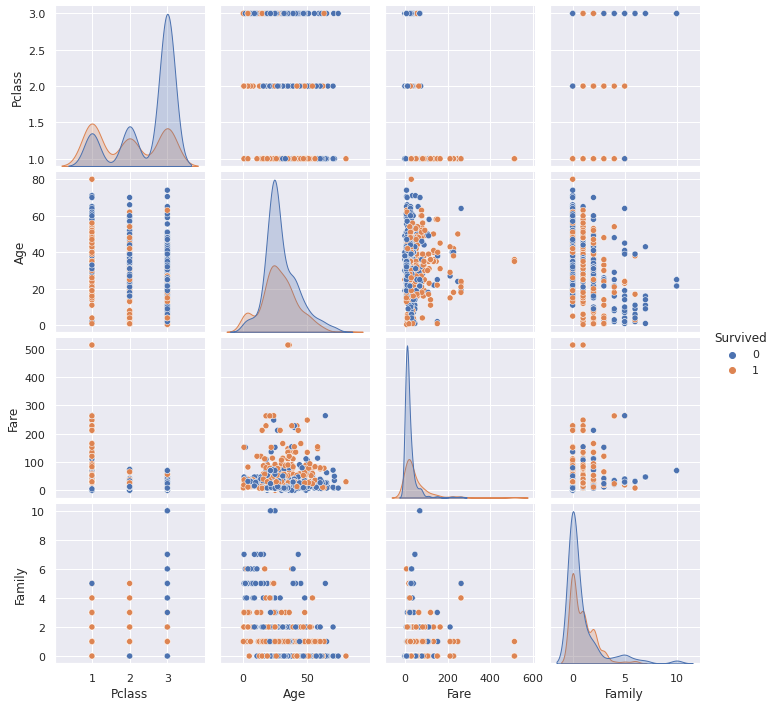

In [93]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df1, hue = 'Survived')
plt.show();

In [94]:
#create a dataset of only non survivors
Not_Survived = df[df['Survived']==0]

#create a dataset of only survivors
Survived = df[df['Survived']==1]


Number of passangers per class
3    491
1    214
2    184
Name: Pclass, dtype: int64 




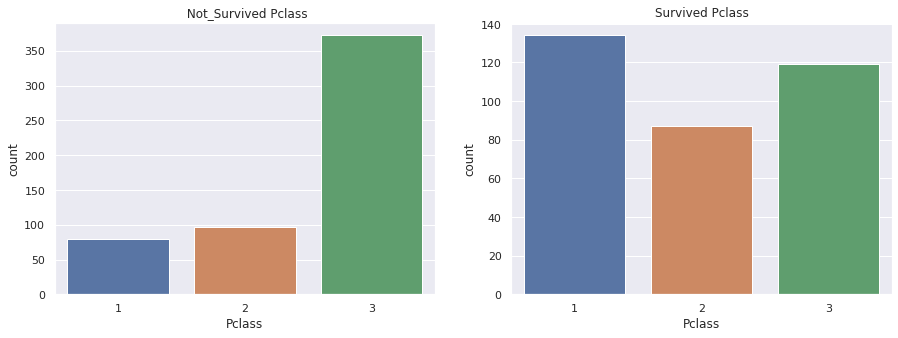

In [95]:
#Compare survival of passagers based on Pclass

#Distribution of passagers across the three classes
x=df['Pclass'].value_counts()
print('Number of passangers per class')
print(x, '\n\n')

#Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Pclass'], ax = ax[0])
ax[0].set_title(' Not_Survived Pclass',)
sns.countplot(Survived['Pclass'], ax = ax[1])
ax[1].set_title('Survived Pclass')
fig.show()



> Most of the passagers on the ship were in Pclass 3. This explains why in the not survived plot, most of them were from Pclass.

> The second plot shows that most of the survivors on the ship were from Pclass 1, which had the least number of passangers on the ship. This means that the passangers in this class ha an advantage over the other passangers.





Passanger gender distribution
male      577
female    312
Name: Sex, dtype: int64 




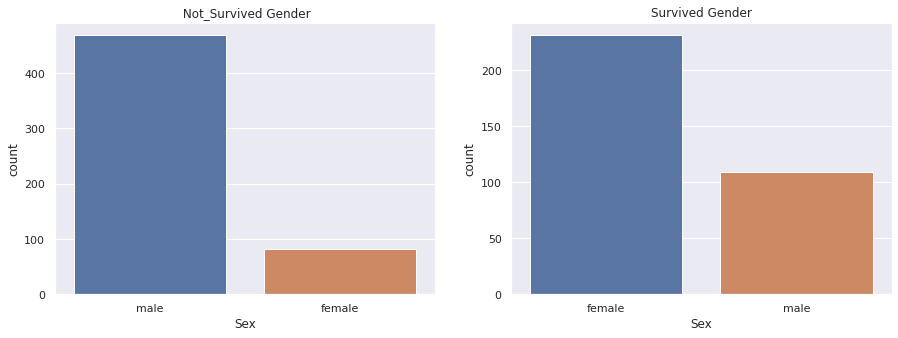

In [96]:
#Compare survival of passagers based on gender

#Gender distribution of passagers 
x=df['Sex'].value_counts()
print('Passanger gender distribution')
print(x, '\n\n')

#Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Sex'], ax = ax[0])
ax[0].set_title(' Not_Survived Gender',)
sns.countplot(Survived['Sex'], ax = ax[1])
ax[1].set_title('Survived Gender')
fig.show()



> Most of the paasanger onboard were male, hence most of the passangers who did not survive are male.

> Looking at the survivors we see that more women than men survived even though there were fewer women on the ship than men.





Count of passanger's family members
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64 




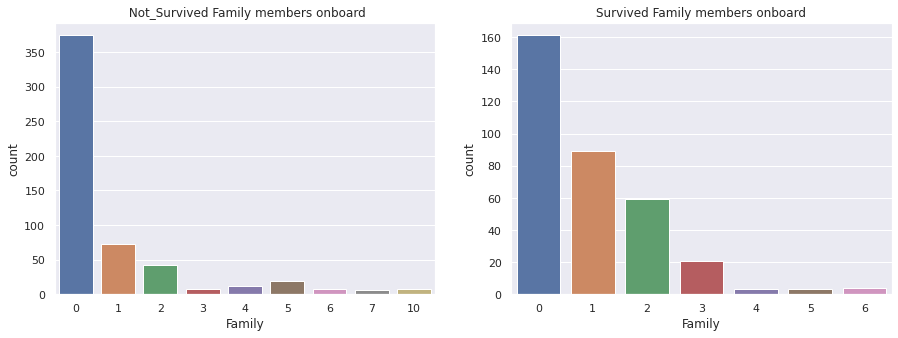

In [97]:
#Compare survival of passagers based on Family size onboard the ship

#Count of passanger's family members 
x=df['Family'].value_counts()
print("Count of passanger's family members")
print(x, '\n\n')

#Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Family'], ax = ax[0])
ax[0].set_title(' Not_Survived Family members onboard',)
sns.countplot(Survived['Family'], ax = ax[1])
ax[1].set_title('Survived Family members onboard')
fig.show()

> Most of the passngers did not have family members with them on the ship. The plots show  that the ration of passangers that survived and those that didn't reflects this. 

> No passanger who had 7/10 family members on the ship survived. 





Count of passanger's point of embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64 




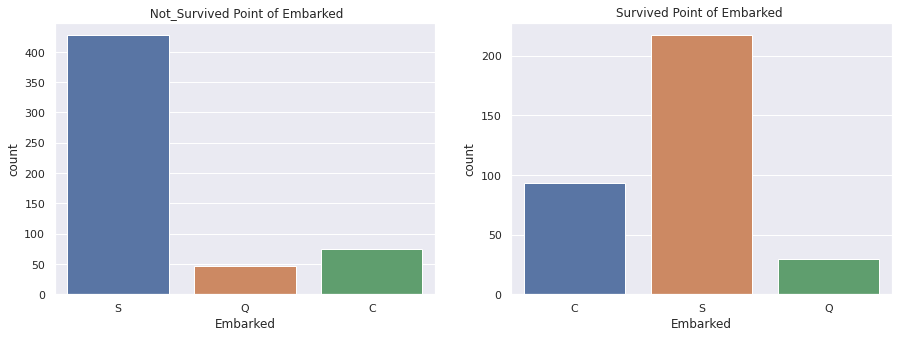

In [98]:
#Compare survival of passagers based on Point of Embarke

#Count of passanger's Embarked members 
x=df['Embarked'].value_counts()
print("Count of passanger's point of embarked")
print(x, '\n\n')

#Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Embarked'], ax = ax[0])
ax[0].set_title(' Not_Survived Point of Embarked',)
sns.countplot(Survived['Embarked'], ax = ax[1])
ax[1].set_title('Survived Point of Embarked ')
fig.show()


> The ration between survivors and non survivors is appromimately the same and simmilar to the ration in the total number of passangers on the ship. This could mean that point of embark did not have much impact on whether the [passanger survivrd or not.



In [99]:
#Compare survival of passagers based on Point of Embarke

#Count of passanger's title members 
x=df['title'].value_counts()
print("Total passanger's on the ship based on social class title")
print(x, '\n\n')

# Number of passanger that survived
x=Not_Survived['title'].value_counts()
print("Count of passanger's the did not survive")
print(x, '\n\n')

#Count of passanger's title members 
x=Survived['title'].value_counts()
print("Count of passanger's that survived")
print(x, '\n\n')





Total passanger's on the ship based on social class title
Commoner    866
Doctor        7
Clergy        6
Noble         5
Military      5
Name: title, dtype: int64 


Count of passanger's the did not survive
Commoner    534
Clergy        6
Doctor        4
Military      3
Noble         2
Name: title, dtype: int64 


Count of passanger's that survived
Commoner    332
Doctor        3
Noble         3
Military      2
Name: title, dtype: int64 




> No member of the clergy survived.



# 8. kNearest Neighbors Model

In [100]:
#Preview of the data
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,Family
0,1,0,3,male,22.0,7.2500,S,Commoner,1
1,2,1,1,female,38.0,71.2833,C,Commoner,1


In [101]:
#We will first label encode the categorical data
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
lb = LE()
colms = [ 'Sex', 'Embarked','title']
for i in colms:
  l = le.fit(df[i])
  df[i] = l.transform(df[i])
  df_test[i] = lb.fit_transform(df_test[i])

#Preview the data frame
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,Family
613,614,0,3,1,25.0,7.7500,1,1,0
471,472,0,3,1,38.0,8.6625,2,1,0
392,393,0,3,1,28.0,7.9250,2,1,2
485,486,0,3,0,21.5,25.4667,2,1,4
522,523,0,3,1,25.0,7.2250,0,1,0


In [102]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,Family
0,892,3,1,34.5,7.8292,1,1,0
1,893,3,0,47.0,7.0000,2,1,1


In [103]:
#We define the dependent and independent features

X = df.iloc[:, 2:]
y = df['Survived']
test_x = df_test.drop('PassengerId', axis=1)


In [104]:
# Normalizing the data  using minmax scaller. 

# Normalization is useful when your data has varying scales and the algorithm you are using does not make 
#      assumptions about the distribution of your data, such as k-nearest neighbors

from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit(X)
X = scaled.transform(X)
test_x = scaled.transform(test_x)

In [105]:
# Split the train data into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#shape or the sub dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((622, 7), (267, 7), (622,), (267,))

In [106]:
#Training the Knn model

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
classifier.fit(X_train, y_train)

# Make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

#Get the metrics of the model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from pprint import pprint
print('KNN model using n= 5 \n\n')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred))


KNN model using n= 5 


[[153  16]
 [ 31  67]] 


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       169
           1       0.81      0.68      0.74        98

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267
 


Model accuracy is :  0.8239700374531835



> The model gave an accuracy of 82.397%. Out of the 267 cases predicted, 220 were accurate and 47 were inaacurate.



In [107]:
#We will use grid search to find the best parameter to fine tune our model.
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
metric = ['cosine','euclidean','manhattan']
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,algorithm=algorithm,weights=weights,metric=metric)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)


In [108]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size']) #1
print('Best p:', best_model.best_estimator_.get_params()['p']) #1
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors']) #26
print('Best metric:', best_model.best_estimator_.get_params()['metric']) #cosine
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm']) # auto
print('Best weights:', best_model.best_estimator_.get_params()['weights']) #uniform

In [109]:
# Predict using the best model
# Make predictions on our test data
---
# 
y_pred_best = best_model.predict(X_test)


#Get the metrics of the model

print(confusion_matrix(y_test, y_pred_best), '\n\n')
print(classification_report(y_test, y_pred_best), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred_best))


The grid search best params give an accuracy of 80.899%. Out of the 267 cases predicted, 216 were accurate predictions while 51 were incorrently predicted.

> 80% of non survivors were accuarately predicted and 85% of survivors were also accurately predicted.



In [110]:
#The initail model get the best accuracy and thus it's the model we'll use using diffent train test split sizes.

# Split the train data into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

#shape or the sub dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,'\n\n\n')

classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
classifier.fit(X_train, y_train)

# Make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

#Get the metrics of the model

print('Using 10% of the data as the test size\n')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred))

(800, 7) (89, 7) (800,) (89,) 



Using 10% of the data as the test size

[[46  8]
 [13 22]] 


              precision    recall  f1-score   support

           0       0.78      0.85      0.81        54
           1       0.73      0.63      0.68        35

    accuracy                           0.76        89
   macro avg       0.76      0.74      0.75        89
weighted avg       0.76      0.76      0.76        89
 


Model accuracy is :  0.7640449438202247




> Using  10% of the data as the test size gives an accuracy of 76.404%. Out of the 89 cases predicted, 68 were accurate predictions while 21 were incorrently predicted.

> 78% of non survivors[0] were accuarately predicted and 73% of survivors[1] were also accurately predicted.



In [111]:
#The initail model get the best accuracy and thus it's the model we'll use using diffent train test split sizes.

# Split the train data into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#shape or the sub dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,'\n\n\n')

classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
classifier.fit(X_train, y_train)

# Make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

#Get the metrics of the model

print('Using 20% of the data as the test size\n')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred))


(711, 7) (178, 7) (711,) (178,) 



Using 20% of the data as the test size

[[105  10]
 [ 19  44]] 


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       115
           1       0.81      0.70      0.75        63

    accuracy                           0.84       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178
 


Model accuracy is :  0.8370786516853933


> Using  20% of the data as the test size gives an accuracy of 83.708%. Out of the 178 cases predicted, 149 were accurate predictions while 29 were incorrently predicted.

> 85% of non survivors[0] were accuarately predicted and 81% of survivors[1] were also accurately predicted.

In [112]:
#The initail model get the best accuracy and thus it's the model we'll use using diffent train test split sizes.

# Split the train data into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

#shape or the sub dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,'\n\n\n')

classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
classifier.fit(X_train, y_train)

# Make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

#Get the metrics of the model

print('Using 40% of the data as the test size\n')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred))

(533, 7) (356, 7) (533,) (356,) 



Using 40% of the data as the test size

[[198  24]
 [ 41  93]] 


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       222
           1       0.79      0.69      0.74       134

    accuracy                           0.82       356
   macro avg       0.81      0.79      0.80       356
weighted avg       0.82      0.82      0.81       356
 


Model accuracy is :  0.8174157303370787


> Using  40% of the data as the test size gives an accuracy of 81.74%. Out of the 356 cases predicted, 291 were accurate predictions while 65 were incorrently predicted.

> 83% of non survivors[0] were accuarately predicted and 76% of survivors[1] were also accurately predicted.

In [113]:
#The initail model get the best accuracy and thus it's the model we'll use using diffent train test split sizes.

# Split the train data into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=10)

#shape or the sub dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,'\n\n\n')

classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
classifier.fit(X_train, y_train)

# Make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

#Get the metrics of the model

print('Using 18% of the data as the test size\n')
print(confusion_matrix(y_test, y_pred), '\n\n')
print(classification_report(y_test, y_pred), '\n\n')
print('Model accuracy is : ', metrics.accuracy_score(y_test, y_pred))

(728, 7) (161, 7) (728,) (161,) 



Using 18% of the data as the test size

[[93  9]
 [17 42]] 


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.82      0.71      0.76        59

    accuracy                           0.84       161
   macro avg       0.83      0.81      0.82       161
weighted avg       0.84      0.84      0.84       161
 


Model accuracy is :  0.8385093167701864


> Using  18% of the data as the test size gives an accuracy of 83.851%. Out of the 161 cases predicted, 135 were accurate predictions while 26 were incorrently predicted.

> 85% of non survivors[0] were accuarately predicted and 82% of survivors[1] were also accurately predicted.

## 9. Implementing the Solution

In [114]:
# Implementing the Solution
#  We will then use the model to pedict whether the passengers in the test data survived or not.

y_predicted = classifier.predict(test_x)

#Add predictions to our test data
df_test['Survived']= y_predicted


#Preview the data
df_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,Family,Survived
0,892,3,1,34.5,7.8292,1,1,0,0
1,893,3,0,47.0,7.0000,2,1,1,0
2,894,2,1,62.0,9.6875,1,1,0,0
3,895,3,1,27.0,8.6625,2,1,0,1
4,896,3,0,22.0,12.2875,2,1,2,1
5,897,3,1,14.0,9.2250,2,1,0,0
6,898,3,0,30.0,7.6292,1,1,0,1
7,899,2,1,26.0,29.0000,2,1,2,0
8,900,3,0,18.0,7.2292,0,1,0,1
9,901,3,1,21.0,24.1500,2,1,2,0


# 10. Challenging the solution

> The model was able to predict the test data at an 83% level of accuracy which is quite good. However there this is not the best accuracy as there was a big number of predictions that were inaacurately predicted(as seen in the confusion matrix). This means that this may not be the best model to predict this dataset.






In [120]:
# Reviewing the Solution 
#
#Check survival ratio by gender
df_test.groupby('Survived')['Sex'].value_counts(normalize = True) # The prediction reflects the actual/expected passenger reports.

Survived  Sex
0         1      0.924303
          0      0.075697
1         0      0.801205
          1      0.198795
Name: Sex, dtype: float64

# 11. Follow up questions

### a). Did we have the right data?

* Yes we did. The dataset had all the neccessary and the validation done showed the data provided did reflect the reports published on the Taitanic passengers and survival reports. 



### b). Did we have the right question?

*  The main objective in this study was to predictict whether the passenger survived or not. Given the data and information available, we can conclude that this was the right question and it was well answered using the Knn Model.

# Conclusion 


> We were able to meet the goal we set for ourselves at the start of our investigation. We were able to develop a prediction model with an accuracy score of more than 80% using K-nearest neighbor, which we used to predict our test data.



